In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical

In [2]:
ff = pd.read_csv('forestfires.csv')

In [3]:
ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
ff.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [5]:
ff.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
ff['day'] = ff.day.map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat':6, 'sun':7})
ff['month'] = ff.month.map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})

In [7]:
ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Outlier

<AxesSubplot:>

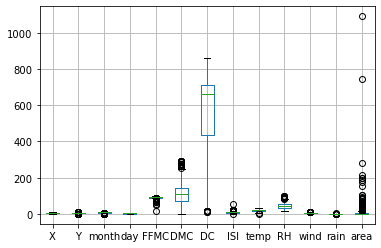

In [8]:
ff.boxplot()

<AxesSubplot:xlabel='ISI'>

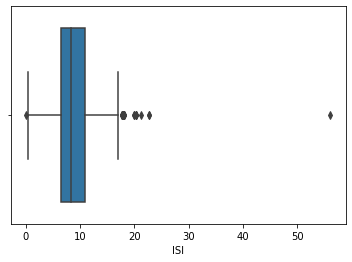

In [9]:
sns.boxplot(x=ff['ISI'])

In [10]:
pd.DataFrame(data=[ff.skew(),ff.kurtosis()],index=['skewness','kurtosis'])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
skewness,0.036246,0.417296,-1.218012,-0.212969,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934
kurtosis,-1.172331,1.420553,0.644362,-1.285554,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721


In [11]:
Q1 = (ff[['FFMC','ISI','rain']]).quantile(0.25)
Q3 = (ff[['FFMC','ISI','rain']]).quantile(0.75)

In [12]:
IQR = Q3 -Q1
maximum = Q3 + (1.5 * IQR)
print('nilai maksimum dari masing-masing variable :')
print(maximum)

minimum = Q1 - (1.5 * IQR)
print('nilai minimum dari masing-masing variable :')
print(minimum)

nilai maksimum dari masing-masing variable :
FFMC    96.95
ISI     17.25
rain     0.00
dtype: float64
nilai minimum dari masing-masing variable :
FFMC    86.15
ISI      0.05
rain     0.00
dtype: float64


In [13]:
more_than = (ff > maximum)
lower_than = (ff < minimum)
ff = ff.mask(more_than, maximum, axis=1)
ff = ff.mask(lower_than, minimum, axis=1)
print('persebaran data setelah ditangani outlier :')
print(ff[['FFMC','ISI','rain']].describe())

persebaran data setelah ditangani outlier :
             FFMC         ISI   rain
count  517.000000  517.000000  517.0
mean    91.302224    8.869729    0.0
std      2.523609    3.882927    0.0
min     86.150000    0.050000    0.0
25%     90.200000    6.500000    0.0
50%     91.600000    8.400000    0.0
75%     92.900000   10.800000    0.0
max     96.200000   17.250000    0.0


# Data Preparation & Preprocessing

In [14]:
dataset = ff.values

In [15]:
dataset.shape

(517, 13)

In [16]:
X = dataset[:,:12]
Y = dataset[:,12:]

In [19]:
Y = np.array(Y).reshape((len(Y), 1))
#Y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y)

In [20]:
X.shape, Y.shape

((517, 12), (517, 1))

In [21]:
Y = to_categorical(Y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((413, 12), (104, 12), (413, 1), (104, 1))

# Model 1

In [24]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=12, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear' ))

In [25]:
# compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [26]:
# train model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100, batch_size=64, verbose=1)

Train on 413 samples, validate on 104 samples
Epoch 1/100
413/413 [==============================] - 2s 4ms/step - loss: 32.6630 - acc: 0.0436 - val_loss: 5.1800 - val_acc: 0.2212
Epoch 2/100
413/413 [==============================] - 0s 36us/step - loss: 11.2020 - acc: 0.0944 - val_loss: 3.0664 - val_acc: 0.2212
Epoch 3/100
413/413 [==============================] - 0s 43us/step - loss: 6.2792 - acc: 0.2155 - val_loss: 2.1334 - val_acc: 0.2885
Epoch 4/100
413/413 [==============================] - 0s 56us/step - loss: 4.3990 - acc: 0.1138 - val_loss: 1.7519 - val_acc: 0.3365
Epoch 5/100
413/413 [==============================] - 0s 46us/step - loss: 3.0659 - acc: 0.2010 - val_loss: 1.6266 - val_acc: 0.3269
Epoch 6/100
413/413 [==============================] - 0s 48us/step - loss: 2.1588 - acc: 0.2276 - val_loss: 1.3096 - val_acc: 0.3654
Epoch 7/100
413/413 [==============================] - 0s 43us/step - loss: 1.5502 - acc: 0.3002 - val_loss: 1.3821 - val_acc: 0.3173
Epoch 8/100
413

413/413 [==============================] - 0s 41us/step - loss: 0.0508 - acc: 0.9685 - val_loss: 0.0892 - val_acc: 0.9519
Epoch 62/100
413/413 [==============================] - 0s 36us/step - loss: 0.0476 - acc: 0.9782 - val_loss: 0.0863 - val_acc: 0.9519
Epoch 63/100
413/413 [==============================] - 0s 36us/step - loss: 0.0483 - acc: 0.9782 - val_loss: 0.0835 - val_acc: 0.9519
Epoch 64/100
413/413 [==============================] - 0s 34us/step - loss: 0.0509 - acc: 0.9782 - val_loss: 0.0853 - val_acc: 0.9519
Epoch 65/100
413/413 [==============================] - 0s 43us/step - loss: 0.0453 - acc: 0.9758 - val_loss: 0.0797 - val_acc: 0.9519
Epoch 66/100
413/413 [==============================] - 0s 48us/step - loss: 0.0429 - acc: 0.9734 - val_loss: 0.0758 - val_acc: 0.9519
Epoch 67/100
413/413 [==============================] - 0s 51us/step - loss: 0.0419 - acc: 0.9782 - val_loss: 0.0742 - val_acc: 0.9519
Epoch 68/100
413/413 [==============================] - 0s 70us/step

In [27]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.993, Valid: 0.981


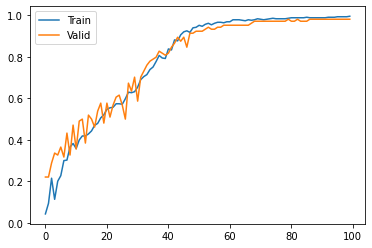

In [28]:
# plot training history
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Valid')
plt.legend()
plt.show()